# Getting Data (API's, scraping, etc.)

In [1]:
from IPython.display import Image
Image(url='https://cdn.sanity.io/images/rzso0e8h/production/da8c3c8105c221ea003ea67057b5a75de819d36d-1920x1280.jpg?w=1920&h=1280&auto=format')

source: https://labor.org.mx/en/exhibitions/printing-out-the-internet

https://christopherbaker.net/projects/murmur-study/

https://twitter.com/everylotla

### Data sets

Need a collection of hugs and kisses, a huge collection of New York Times articles?  
https://academictorrents.com

Text corpora  
https://github.com/dariusk/corpora/tree/master/data

Data from around the world  
http://datacatalogs.org/

Machine learning datasets  
https://www.kaggle.com/datasets


### API's

#### Wikipedia

In [2]:
!pip install wikipedia

In [8]:
import wikipedia

'''
Install wikipedia first
pip install wikipedia

Check wikipedia API doc: 
https://wikipedia.readthedocs.io/en/latest/code.html#api
'''

# # Search for something
# print(wikipedia.search("wtf"))

# # Get a summary of page 
# print(wikipedia.summary("random"))

# Get a number of random topics
# print(wikipedia.random(pages=4))

# # Get a list of image urls of a page
print(wikipedia.page("random").images)

# # Or just the first image
image_url = wikipedia.page("random").images[0]

from IPython.display import Image
Image(url=image_url)

['https://upload.wikimedia.org/wikipedia/commons/a/ae/C%C3%B4ne_textileII.png', 'https://upload.wikimedia.org/wikipedia/commons/c/c6/Fast_erroneous_self_switching_of_audio_amp_inputs.webm', 'https://upload.wikimedia.org/wikipedia/commons/3/3f/Monty_open_door.svg', 'https://upload.wikimedia.org/wikipedia/commons/3/3e/Nuvola_apps_edu_mathematics_blue-p.svg', 'https://upload.wikimedia.org/wikipedia/commons/3/37/People_icon.svg', 'https://upload.wikimedia.org/wikipedia/commons/e/ec/RandomBitmap.png', 'https://upload.wikimedia.org/wikipedia/commons/2/26/Roulette_wheel.jpg', 'https://upload.wikimedia.org/wikipedia/commons/3/3a/Standard_deviation_diagram_micro.svg', 'https://upload.wikimedia.org/wikipedia/commons/f/fa/Wikiquote-logo.svg', 'https://upload.wikimedia.org/wikipedia/commons/0/0b/Wikiversity_logo_2017.svg', 'https://upload.wikimedia.org/wikipedia/commons/9/99/Wiktionary-logo-en-v2.svg', 'https://upload.wikimedia.org/wikipedia/commons/1/1e/Circle_map_poincare_recurrence.jpeg', 'http

https://en.wikipedia.org/wiki/Wikipedia:Getting_to_Philosophy

### Reddit API wrapper (PRAW)

In [9]:
!pip install praw

In [10]:
import praw

In [12]:
print("INFO: Connecting to reddit...")

# For this api to work you need to first register an account 
# and fill in the data here

r = praw.Reddit(
    client_id="XWqof3jNyi70G1kOhxfVQg",
    client_secret="zCBNFDW_b8EbV1nxRrNzBd0-gWmXvQ",
    user_agent="Zealousideal-Iron724",
)

if not r.read_only:

    raise Exception("ERROR: Can't connect to reddit")

else:

    print("INFO: Connected")
    
for submission in r.subreddit("worldnews").hot(limit=10):
    
    print(submission.title)

INFO: Connecting to reddit...
INFO: Connected
/r/WorldNews Live Thread: Russian Invasion of Ukraine Day 253, Part 1 (Thread #394)
Putin calls for modernisation of Russian military weapons
Germany to force plastic makers to help pay for cleanups
Bolsonaro tells protesting truckers to clear roads
Russia lost over 700 soldiers and 20 tanks on 2 November
‘We are for democracy’: Brazil football fans clear pro-Bolsonaro blockades | Brazil
Growing majority of Britons think Brexit was a mistake, new poll shows
‘Final Destruction’: Russia Threatens Norway With Ugly Fall Out
N.Korea fires over 20 missiles on Wednesday
Putin has not yet decided if he'll run for new presidential term in 2024, Kremlin says


### Youtube downloader (YT-DLP)

In [13]:
!pip install yt-dlp

In [14]:
!mkdir yt_vids

In [15]:
import yt_dlp

downloads = 'yt_vids'

ydl_opts = {
    'outtmpl': downloads + '/%(id)s.%(ext)s',
    'quiet': False,
    'format_sort': ['res:1080', 'ext:mp4:m4a'],
    'ignoreerrors': False
}

URL = 'https://www.youtube.com/watch?v=ysU9hh4pBjc'

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    
    info = ydl.extract_info(URL, download=False)
    
    if info:
        width = info.get('width')
        height = info.get('height')
        duration = info.get('duration')
        title = info.get('title')
        id = info.get('id')
        
    
    print("width: {}, height: {}, duration: {}, title: {}, id: {}".format(width, height, duration, title, id))
    ydl.download(URL)   

[youtube] ysU9hh4pBjc: Downloading webpage
[youtube] ysU9hh4pBjc: Downloading android player API JSON
width: 640, height: 480, duration: 3, title: 360 Rotation of a Scorpion, id: ysU9hh4pBjc
[youtube] ysU9hh4pBjc: Downloading webpage
[youtube] ysU9hh4pBjc: Downloading android player API JSON
[info] ysU9hh4pBjc: Downloading 1 format(s): 135+140
[download] Destination: yt_vids/ysU9hh4pBjc.f135.mp4
[download] 100% of  277.06KiB in 00:00:00 at 658.66KiB/s 
[download] Destination: yt_vids/ysU9hh4pBjc.f140.m4a
[download] 100% of   55.40KiB in 00:00:00 at 569.01KiB/s 
[Merger] Merging formats into "yt_vids/ysU9hh4pBjc.mp4"
Deleting original file yt_vids/ysU9hh4pBjc.f140.m4a (pass -k to keep)
Deleting original file yt_vids/ysU9hh4pBjc.f135.mp4 (pass -k to keep)


In [16]:
print(id)

ysU9hh4pBjc


In [17]:
from IPython.display import Video

Video("yt_vids/{}.mp4".format(id))  

You can find some documentation here: https://github.com/yt-dlp/yt-dlp#embedding-yt-dlp

### Downloading unsecured IP cameras

In [ ]:
http://insecam.org/en/view/921591/

In [ ]:
!pip install ffmpeg-python

In [21]:
import ffmpeg 
import os
import time

In [22]:
cam_urls = [
    "http://128.101.85.194/mjpg/video.mjpg",
    "http://96.91.239.26:1024/mjpg/video.mjpg",
    "http://84.82.29.229:8080/mjpg/video.mjpg"
]

In [23]:
def download_from_ip(url, dir, idx):

    out_path = os.path.join(dir, "stream_{:03d}".format(idx))
    
    process = (
        ffmpeg
        .input(url)
        .output('{}.mkv'.format(out_path), codec="copy")
        .overwrite_output()
        .run_async(pipe_stdout=True)
    )
    
    print("starting capture")
    time.sleep(10)
    print("ending capture")
    process.stdout.close()
    process.kill()
        

In [24]:
out_dir = "insecam_streams"

if not os.path.exists(out_dir):
    
    os.makedirs(out_dir)

for idx, url in enumerate(cam_urls):

    download_from_ip(url, out_dir, idx)

starting capture


ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.0.0 (clang-1300.0.29.30)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
 

ending capture
starting capture


ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.0.0 (clang-1300.0.29.30)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
 

ending capture
starting capture


ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.0.0 (clang-1300.0.29.30)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
 

ending capture


### Download livstreams with streamlink

In [27]:
!pip install streamlink

In [29]:
import streamlink

url = "https://www.adultswim.com/streams/rick-and-morty"

out_dir = "streamlink"

if not os.path.exists(out_dir):
    
    os.makedirs(out_dir)

try:
    
    stream_url = streamlink.streams(url)['best'].url
    
except:
    
    print("couldn't find stream at {}".format(url))

print("found stream at {}".format(stream_url))

streamer = url.split("/")[-1]

out_path = os.path.join(out_dir, streamer)

process = (
    ffmpeg
    .input(stream_url)
    .output('{}.mkv'.format(out_path), codec="copy")
    .overwrite_output()
    .run_async(pipe_stdout=True)
)

print("starting capture")
time.sleep(10)
print("ending capture")
process.stdout.close()
process.kill()

found stream at https://adultswim-vodlive.cdn.turner.com/live/rick-and-morty/stream_7.m3u8
starting capture


ffmpeg version 5.0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.0.0 (clang-1300.0.29.30)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
 

ending capture


You can check all streamlink plugins here: https://streamlink.github.io/plugins.html#plugins

In [30]:
!pip install pandas

In [31]:
import pandas as pd

In [32]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [34]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [35]:
!pip install opendatasets

In [36]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/unsdsn/world-happiness")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  carl69


Your Kaggle Key:

  ········


100%|██████████████████████████████████████| 36.8k/36.8k [00:00<00:00, 14.8MB/s]

The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [37]:
happy_dataframe = pd.read_csv("world-happiness/2015.csv", sep=",")
happy_dataframe.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [40]:
happy_dataframe.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<AxesSubplot: title={'center': 'Happiness Score'}>]], dtype=object)

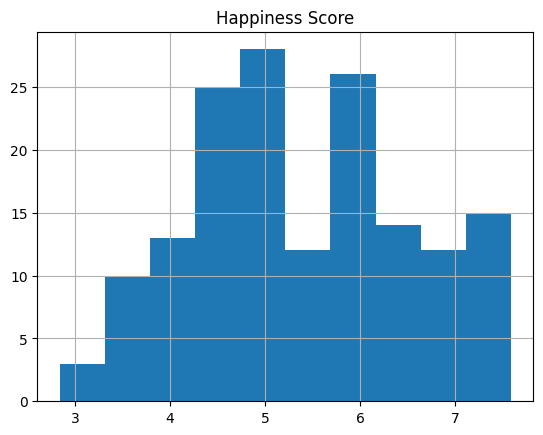

In [42]:
happy_dataframe.hist('Happiness Score')

#### PPRINT

In [ ]:
import pprint

json_dict = {"hyperspace": {"constraints": [], "design": [["windFarm.windparkSize.k", "continuous", [0, 0, 5]], ["hydroPlant.primaryControlMax", "continuous", [100, 300]]], "kpis": ["frequency.y", "city.load.p[2]"]}, "lhc_size": 10, "number_of_runs": 10}

formatted_json_str = pprint.pformat(json_dict)
print(formatted_json_str)
pprint.pprint(json_dict)